### Import Statements

In [48]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [49]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [50]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [51]:
print(df_data.shape)
print(df_data.columns)
print(df_data.info())

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non

In [52]:
df_data.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### Check for Duplicates

In [53]:
df_data.duplicated().any()

False

In [54]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Check for NaN Values

In [55]:
df_data.loc[df_data['motivation'].isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,United Kingdom,Male,NaN,NaN,NaN,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1984,Peace,The Nobel Peace Prize 1984,NaN,1/1,Individual,Desmond Mpilo Tutu,1931-10-07,Klerksdorp,South Africa,South Africa,Male,NaN,NaN,NaN,ZAF
558,1985,Peace,The Nobel Peace Prize 1985,NaN,1/1,Organization,International Physicians for the Prevention of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,1986,Peace,The Nobel Peace Prize 1986,NaN,1/1,Individual,Elie Wiesel,1928-09-30,Sighet,Romania,Romania,Male,NaN,NaN,NaN,ROU
588,1988,Peace,The Nobel Peace Prize 1988,NaN,1/1,Organization,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_data.loc[df_data['birth_date'].isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_data.loc[df_data['organization_name'].isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ
942,2019,Literature,The Nobel Prize in Literature 2019,“for an influential work that with linguistic ...,1/1,Individual,Peter Handke,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN,AUT
946,2019,Peace,The Nobel Peace Prize 2019,“for his efforts to achieve peace and internat...,1/1,Individual,Abiy Ahmed Ali,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN,ETH
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


In [58]:
df_data.loc[df_data['birth_city'].isna()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Convert Year and Birth Date to Datetime

In [59]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [60]:
separated_values = df_data['prize_share'].astype(str).str.split('/', expand=True)
numerators = pd.to_numeric(separated_values[0])
denominators = pd.to_numeric(separated_values[1])

In [61]:
df_data['share_pct'] = numerators/denominators

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [62]:
gender_breakdown = df_data['sex'].value_counts(dropna=False)
gender_breakdown

Male      876
Female     58
NaN        28
Name: sex, dtype: int64

In [63]:
fig = px.pie(gender_breakdown,
       names=['Male', 'Female', 'Organisation'],
       values=gender_breakdown.values,
       title="Nobel prizes by gender")

fig.update_traces(textposition='outside', textinfo='percent+label', hole=0.5)

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?


In [64]:
df_data[df_data['sex'] == 'Female'].sort_values('year')['full_name'][0:3]

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [65]:
df_data[df_data['sex'] == 'Female'].sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Italy,Female,NaN,NaN,NaN,ITA,1.00
141,1928,Literature,The Nobel Prize in Literature 1928,"""principally for her powerful descriptions of ...",1/1,Individual,Sigrid Undset,1882-05-20,Kalundborg,Denmark,Denmark,Female,NaN,NaN,NaN,DNK,1.00
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,United States of America,Female,NaN,NaN,NaN,USA,0.50
179,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,Individual,Irène Joliot-Curie,1897-09-12,Paris,France,France,Female,Institut du Radium,Paris,France,FRA,0.50
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,United States of America,Female,NaN,NaN,NaN,USA,1.00
218,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1/1,Individual,Gabriela Mistral,1889-04-07,Vicuña,Chile,Chile,Female,NaN,NaN,NaN,CHL,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [66]:
df_data[df_data['full_name'].duplicated(False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


In [67]:
df_data[df_data['full_name'] == 'Marie Curie, née Sklodowska']

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00


# Number of Prizes per Category


In [68]:
category_count = df_data['category'].value_counts()

In [69]:
fig = px.bar(category_count,
             x=category_count.index,
             y=category_count.values,
             labels={'y': 'Number of awards',
                     'index': 'Category'},
             title='Number of Nobel Prizes per category',
             color=category_count.values,
             color_continuous_scale='Aggrnyl')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')

fig.show()

In [70]:
df_data[df_data['category'] == 'Economics'].sort_values('year', ascending=True)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50


# Male and Female Winners by Category


In [71]:
category_count_gender = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
category_count_gender.sort_values('sex', inplace=True, ascending=False)
category_count_gender

,category,sex,prize
1,Chemistry,Male,179
3,Economics,Male,84
5,Literature,Male,101
7,Medicine,Male,210
9,Peace,Male,90
11,Physics,Male,212
0,Chemistry,Female,7
2,Economics,Female,2
4,Literature,Female,16
6,Medicine,Female,12


In [72]:
fig = px.bar(category_count_gender,
             x='category',
             y='prize',
             labels={'y': 'Number of awards',
                     'index': 'Category'},
             title='Number of Nobel Prizes per category',
             color=category_count_gender['sex'],
             color_continuous_scale='Aggrnyl')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes',
                    barmode='stack',
                    xaxis={'categoryorder':'sum descending'})

fig.show()

# Number of Prizes Awarded Over Time


In [73]:
prizes_year = df_data.groupby(['year'], as_index=True).agg({"prize": pd.Series.count})
prizes_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


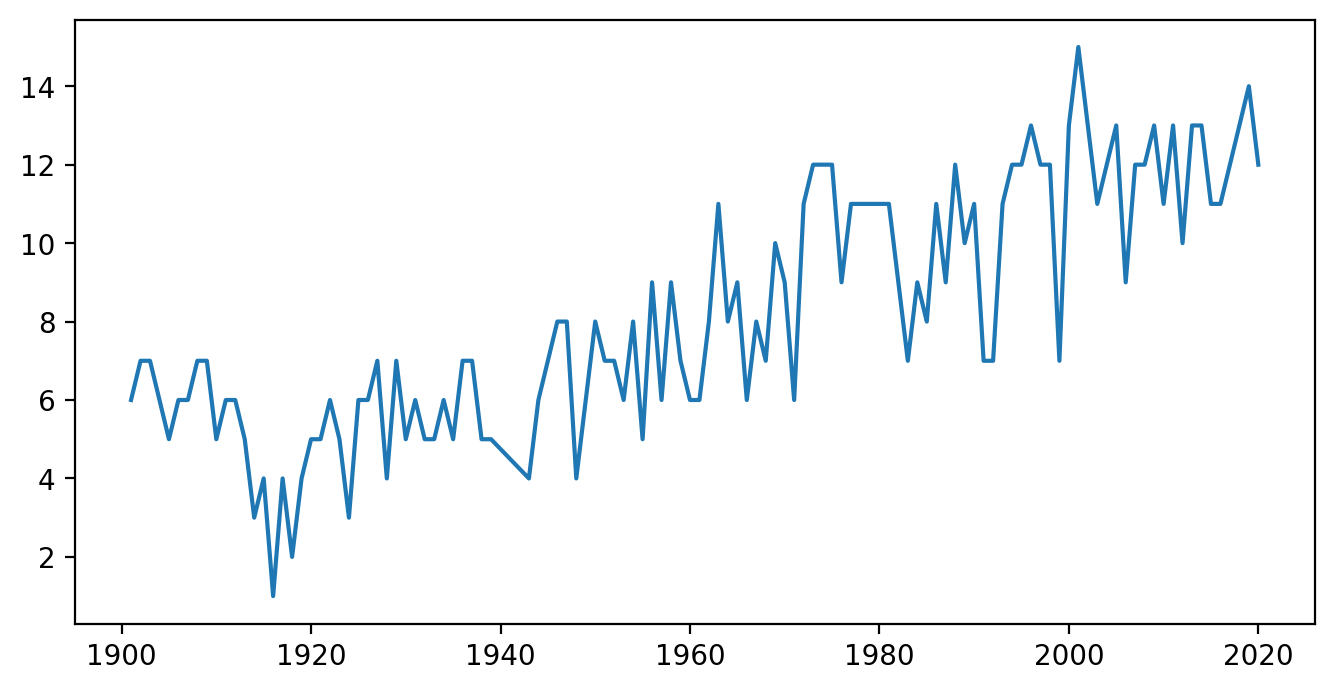

In [74]:
plt.figure(figsize=(8,4), dpi=200)
plt.plot(prizes_year.index, prizes_year.prize)
plt.show()

In [75]:
rolling_5_year = prizes_year.rolling(5).mean()
rolling_5_year

,prize
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,6.20
...,...
2016,11.60
2017,12.00
2018,12.00


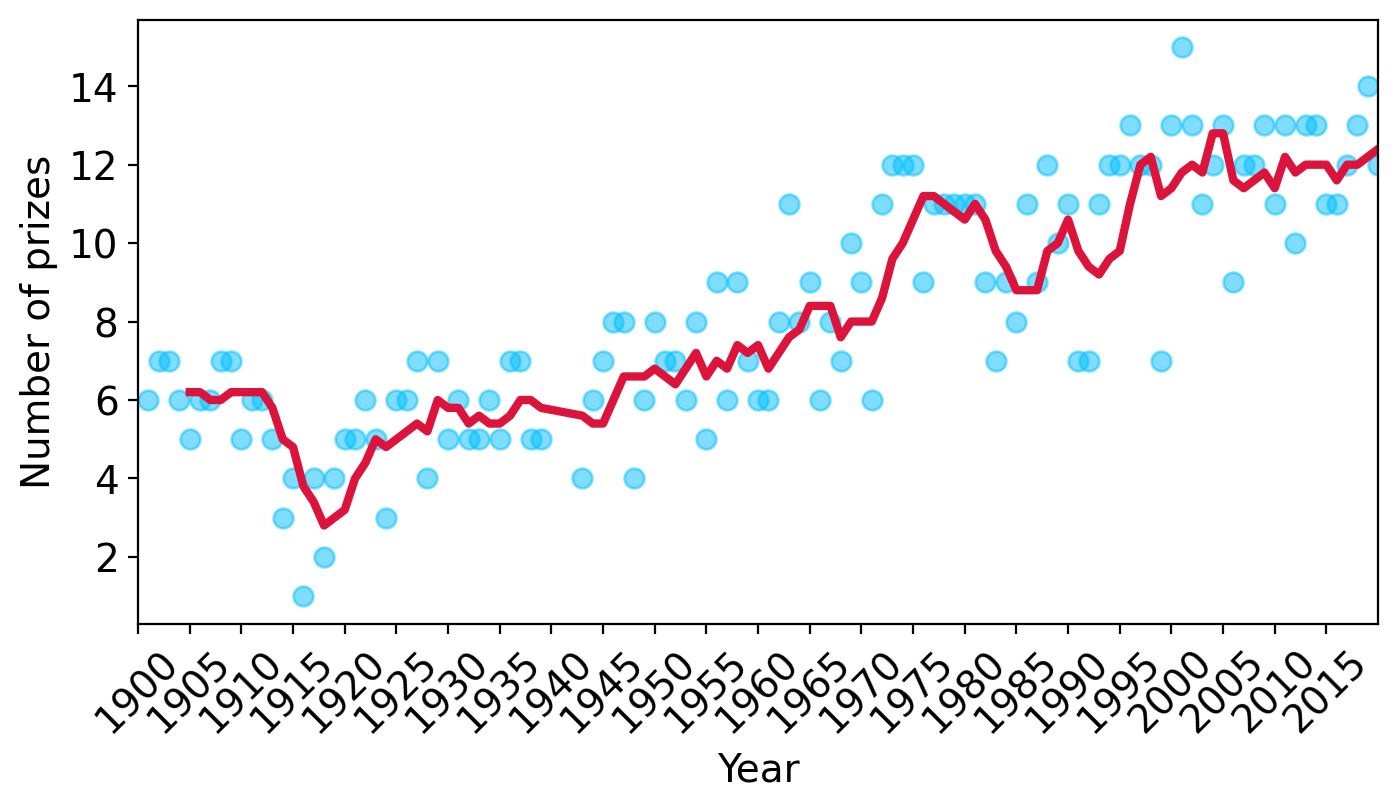

In [30]:
xbar_ticks = np.arange(1900, 2020, 5)
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(ticks=xbar_ticks,
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax1.set_xlim(1900, 2020)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Number of prizes", fontsize=14)
ax1.scatter(prizes_year.index, prizes_year.values, color='deepskyblue', alpha=0.5, s=50)
ax1.plot(rolling_5_year.index, rolling_5_year.values, color='crimson', linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?


In [31]:
share_pct_by_year = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
share_pct_by_year

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [32]:
rolling_share_pct_by_year = share_pct_by_year.rolling(5).mean()

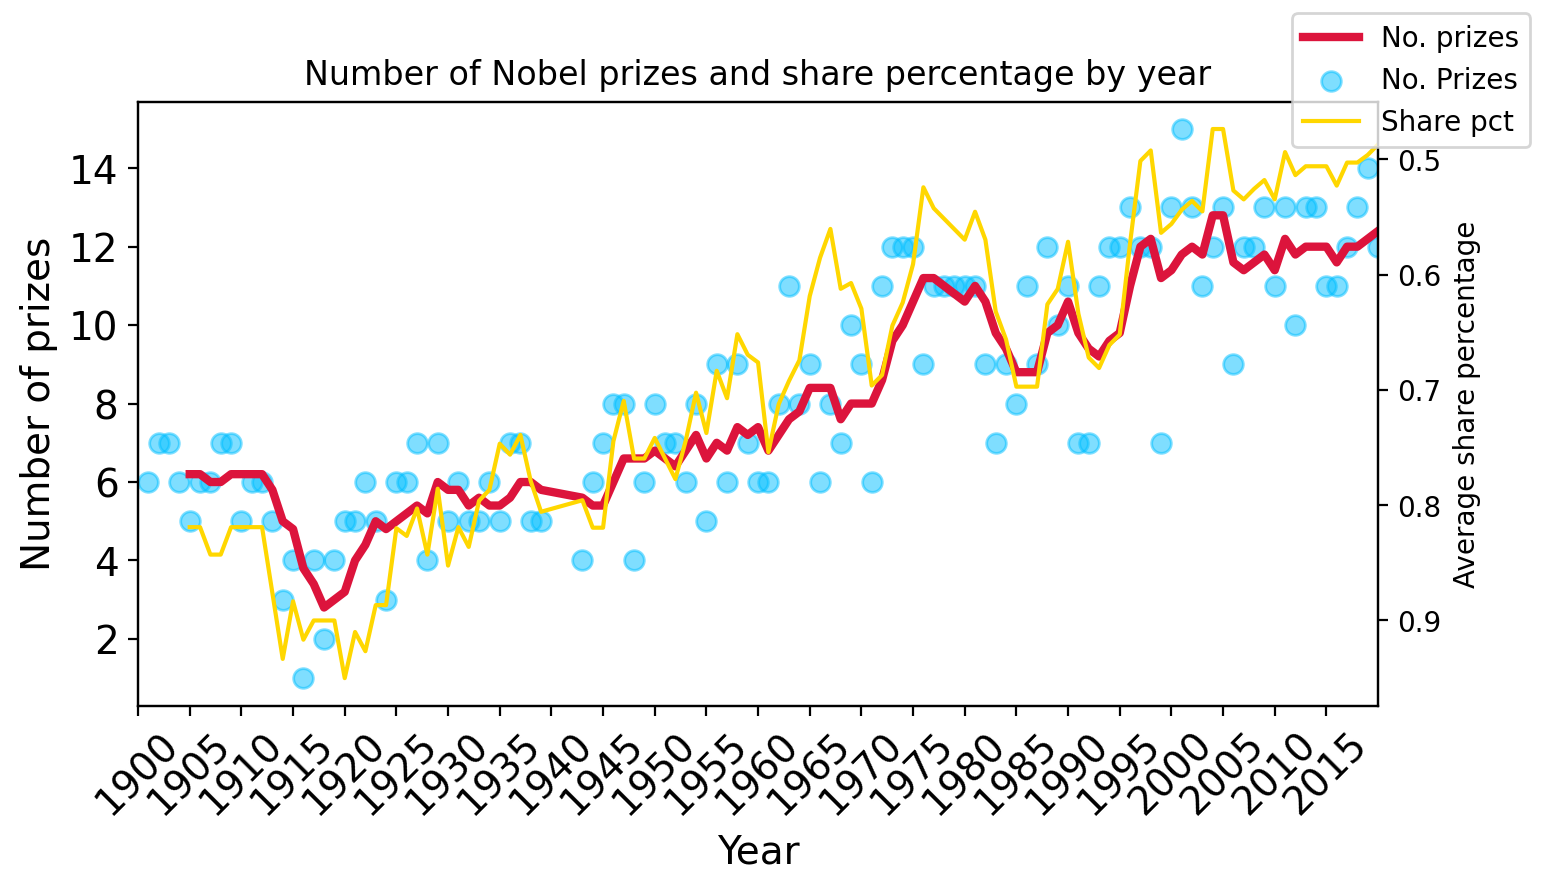

In [33]:
xbar_ticks = np.arange(1900, 2020, 5)
fig = plt.figure(figsize=(8,4), dpi=200)
plt.xticks(ticks=xbar_ticks,
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)
ax1 = plt.gca()
ax1.set_xlim(1900, 2020)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Number of prizes", fontsize=14)
ax1.scatter(prizes_year.index, prizes_year.values, color='deepskyblue', alpha=0.5, s=50, label="No. Prizes")
ax1.plot(rolling_5_year.index, rolling_5_year.values, color='crimson', linewidth=3, label="No. prizes")

ax2=ax1.twinx()
ax2.plot(rolling_share_pct_by_year.index, rolling_share_pct_by_year.values, color='gold', label="Share pct")
ax2.set_ylabel("Average share percentage")
ax2.invert_yaxis()
fig.legend()
plt.title("Number of Nobel prizes and share percentage by year")
plt.show()

# The Countries with the Most Nobel Prizes

In [34]:
top_20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=True).tail(20)
top_20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [35]:
fig = px.bar(top_20_countries,
             y=top_20_countries.birth_country_current,
             x=top_20_countries.prize,
             orientation='h',
             color_continuous_scale='Viridis',
             color='prize',
             title='Number of Nobel Prizes by top 20 countries',
             width=1000,
             height=800)

fig.update_layout(xaxis_title='Number of prizes',
                  yaxis_title='Birth country (current name)',
                  coloraxis_showscale=False)

fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country


In [37]:
top_countries_iso = df_data.groupby(['ISO', 'birth_country_current'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=True)
top_countries_iso

,ISO,birth_country_current,prize
39,IRQ,Iraq,1
30,GLP,Guadeloupe Island,1
31,GRC,Greece,1
33,HRV,Croatia,1
35,IDN,Indonesia,1
...,...,...,...
68,SWE,Sweden,29
27,FRA,France,57
19,DEU,Germany,84
28,GBR,United Kingdom,105


In [38]:
fig = px.choropleth(top_countries_iso,
                    locations='ISO',
                    color='prize', 
                    hover_name='birth_country_current',
                    color_continuous_scale=px.colors.sequential.matter)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 



In [39]:
country_category_prize = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
merged_df = country_category_prize.merge(top_20_countries, on='birth_country_current')

In [40]:
merged_df.columns = ['birth_country_current', 'category', 'category_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True, ascending=True)

In [41]:
merged_df

,birth_country_current,category,category_prize,total_prize
12,Belgium,Peace,3,9
42,Hungary,Chemistry,3,9
43,Hungary,Economics,1,9
52,India,Physics,1,9
51,India,Peace,1,9
...,...,...,...,...
104,United States of America,Chemistry,55,281
105,United States of America,Economics,49,281
106,United States of America,Literature,10,281
107,United States of America,Medicine,78,281


In [42]:
fig = px.bar(merged_df,
             x='category_prize',
             y='birth_country_current',
             orientation='h',
             color='category',
             height=800,
             width=1100
             )

fig.update_layout(barmode='stack', yaxis={'categoryorder': 'sum ascending'}, yaxis_title='Birth country current name', xaxis_title='Prizes')
fig.show()

In [43]:
merged_df[merged_df['birth_country_current'] == 'Australia']

,birth_country_current,category,category_prize,total_prize
0,Australia,Chemistry,1,10
2,Australia,Physics,2,10
1,Australia,Medicine,7,10
